# Data

## Init

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.7 MB/s eta 0:00:00


In [ ]:
## 17 min

# !cp -r /content/gdrive/Shareddrives/gdrive/datasets/thesis/AMZN-dataset/amzn-texts /content
# !cp -r /content/gdrive/Shareddrives/gdrive/datasets/thesis/AAPL-dataset/aapl-texts /content
!cp -r /content/gdrive/Shareddrives/gdrive/datasets/thesis/MSFT-dataset/msft-texts /content

In [ ]:
import os
import pickle
from datetime import datetime, timedelta
from tqdm import tqdm

input_folder = "msft-texts"
company_ticker = input_folder.split('-')[0]

# Получаем список всех файлов в папке msft-texts
files = os.listdir(input_folder)

# Создаем пустой список для хранения данных
data_list = []

# Перебираем файлы
with tqdm(total=len(files)) as pbar:
    for i, file_name in enumerate(files):
        # Игнорируем файлы, не являющиеся текстовыми файлами
        if not file_name.endswith(".txt"):
            continue

        # Извлекаем дату из названия файла
        date_str = '-'.join(file_name.split('.')[-2].split('-')[-3:])
        # file_date = datetime.strptime(date_str, '%Y-%m-%d').date()

        # Открываем файл и читаем ID, заголовок и текст
        with open(os.path.join(input_folder, file_name), 'r', encoding='utf-8') as file:
            text_id = file.readline().strip()
            title = file.readline().strip()
            content = file.read().strip()

        # Создаем словарь из данных файла
        data_item = {
            "file_name": file_name,
            "date_str": date_str,
            "text_id": text_id,
            "title": title,
            "content": content
        }

        # Добавляем словарь в список
        data_list.append(data_item)

        # Сохраняем список в pickle на каждой итерации
        with open(f'data_dump_{company_ticker}.pickle', 'wb') as f:
            pickle.dump(data_list, f)

        # Обновляем индикатор tqdm
        pbar.update()


# Преобразуем список в датафрейм после завершения цикла
import pandas as pd

df = pd.DataFrame(data_list)
df['ticker'] = f'{company_ticker}'

# Сохраняем датафрейм в файл
df.to_csv(f'data-{company_ticker}.csv', index=False)


100%|█████████▉| 11397/11398 [25:47<00:00,  7.36it/s]


In [ ]:
df

In [ ]:
!cp /content/data-msft.csv /content/gdrive/Shareddrives/gdrive/datasets/thesis/MSFT-dataset
!cp /content/data_dump_msft.pickle /content/gdrive/Shareddrives/gdrive/datasets/thesis/MSFT-dataset

## Load

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/MSFT-dataset/msft_df_scaled.parquet /content
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AMZN-dataset/amzn_df_scaled.parquet /content
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AAPL-dataset/aapl_df_scaled.parquet /content

!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/MSFT-dataset/msft_df.parquet /content
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AMZN-dataset/amzn_df.parquet /content
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AAPL-dataset/aapl_df.parquet /content

In [3]:
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AMZN-dataset/data-amzn.csv /content
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AMZN-dataset/data_dump_amzn.pickle /content

!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AAPL-dataset/data-aapl.csv /content
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AAPL-dataset/data_dump_aapl.pickle /content

!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/MSFT-dataset/data-msft.csv /content
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/MSFT-dataset/data_dump_msft.pickle /content

<ipython-input-4-3bbdbe9e8dc4>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_amzn_filtered['year_month'] = data_amzn_filtered['date_str'].dt.strftime('%Y-%m')
<ipython-input-4-3bbdbe9e8dc4>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_aapl_filtered['year_month'] = data_aapl_filtered['date_str'].dt.strftime('%Y-%m')


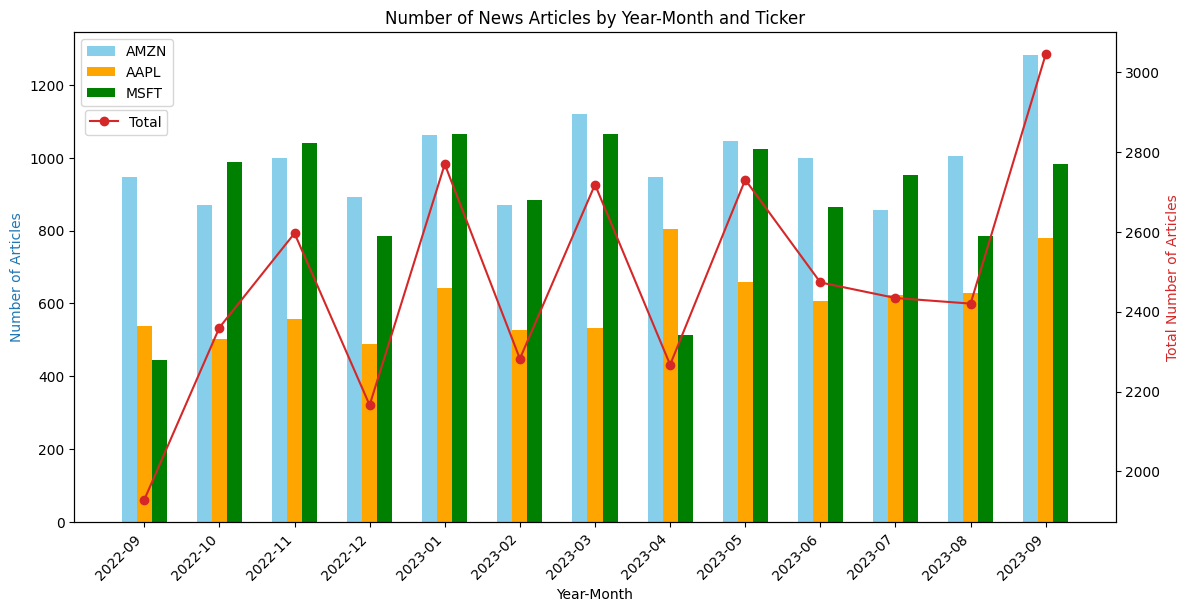

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV files
data_amzn = pd.read_csv("data-amzn.csv")
data_aapl = pd.read_csv("data-aapl.csv")
data_msft = pd.read_csv("data-msft.csv")

# Convert date_str to datetime
data_amzn['date_str'] = pd.to_datetime(data_amzn['date_str'])
data_aapl['date_str'] = pd.to_datetime(data_aapl['date_str'])
data_msft['date_str'] = pd.to_datetime(data_msft['date_str'])

# Filter dates between September 1, 2022, and September 30, 2023
start_date = pd.Timestamp(2022, 9, 1)
end_date = pd.Timestamp(2023, 9, 30)

data_amzn_filtered = data_amzn[(data_amzn['date_str'] >= start_date) & (data_amzn['date_str'] <= end_date)]
data_aapl_filtered = data_aapl[(data_aapl['date_str'] >= start_date) & (data_aapl['date_str'] <= end_date)]
data_msft_filtered = data_msft[(data_msft['date_str'] >= start_date) & (data_msft['date_str'] <= end_date)]

# Extract year and month
data_amzn_filtered['year_month'] = data_amzn_filtered['date_str'].dt.strftime('%Y-%m')
data_aapl_filtered['year_month'] = data_aapl_filtered['date_str'].dt.strftime('%Y-%m')
data_msft_filtered['year_month'] = data_msft_filtered['date_str'].dt.strftime('%Y-%m')

# Group by year_month and count the number of news articles
counts_amzn = data_amzn_filtered.groupby(['year_month']).size().tolist()
counts_aapl = data_aapl_filtered.groupby(['year_month']).size().tolist()
counts_msft = data_msft_filtered.groupby(['year_month']).size().tolist()
year_months = sorted(set(data_amzn_filtered['year_month']).union(set(data_aapl_filtered['year_month']), set(data_msft_filtered['year_month'])))

# Calculate total counts
total_counts = [sum(count) for count in zip(counts_amzn, counts_aapl, counts_msft)]

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.bar([i - 0.2 for i in range(len(year_months))], counts_amzn, width=0.2, color='skyblue', label='AMZN')
ax1.bar([i for i in range(len(year_months))], counts_aapl, width=0.2, color='orange', label='AAPL')
ax1.bar([i + 0.2 for i in range(len(year_months))], counts_msft, width=0.2, color='green', label='MSFT')
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Number of Articles', color=color)
ax1.set_xticks(range(len(year_months)))
ax1.set_xticklabels(year_months, rotation=45, ha='right')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(range(len(year_months)), total_counts, color=color, linestyle='-', marker='o', label='Total')
ax2.set_ylabel('Total Number of Articles', color=color)
ax2.legend(loc=(0.01, 0.79))

fig.tight_layout()
plt.title('Number of News Articles by Year-Month and Ticker')
plt.show()

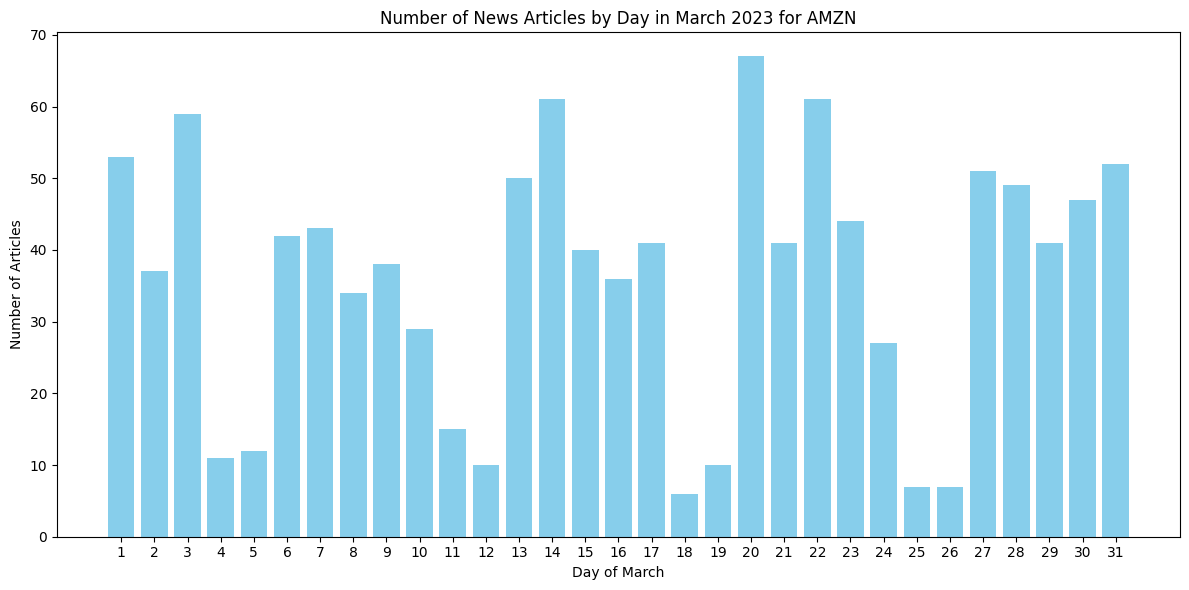

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV files
# data_amzn = pd.read_csv("data-amzn.csv")

# Convert date_str to datetime
data_amzn['date_str'] = pd.to_datetime(data_amzn['date_str'])

# Filter dates for March 2023
start_date = pd.Timestamp(2023, 3, 1)
end_date = pd.Timestamp(2023, 3, 31)

data_amzn_filtered = data_amzn[(data_amzn['date_str'] >= start_date) & (data_amzn['date_str'] <= end_date)]

# Group by day and count the number of news articles
daily_counts = data_amzn_filtered.groupby(data_amzn_filtered['date_str'].dt.day).size().tolist()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(range(1, 32), daily_counts, color='skyblue')

plt.title('Number of News Articles by Day in March 2023 for AMZN')
plt.xlabel('Day of March')
plt.ylabel('Number of Articles')
plt.xticks(range(1, 32))
plt.tight_layout()
plt.show()


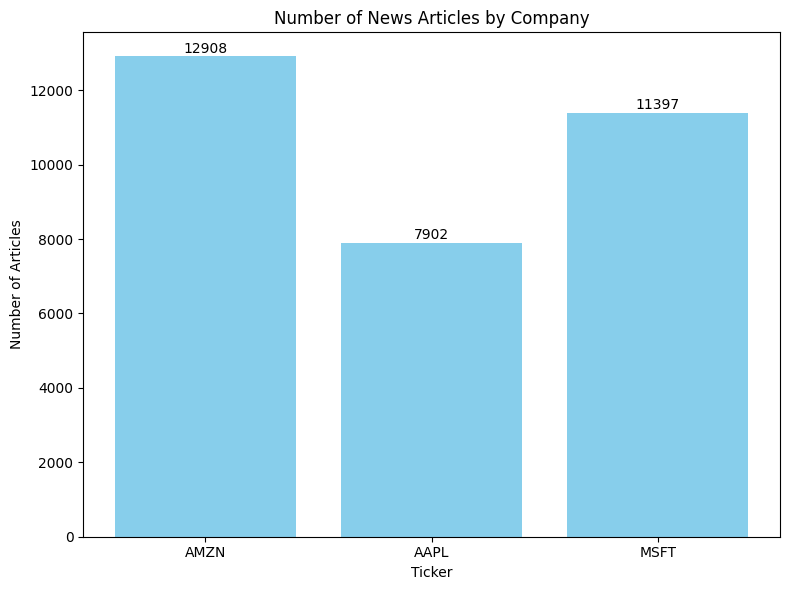

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV files
# data_amzn = pd.read_csv("data-amzn.csv")
# data_aapl = pd.read_csv("data-aapl.csv")
# data_msft = pd.read_csv("data-msft.csv")

# Count rows
row_counts = [len(data_amzn), len(data_aapl), len(data_msft)]
tickers = ['AMZN', 'AAPL', 'MSFT']

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(tickers, row_counts, color='skyblue')

# Add exact numbers on top of each bar
for bar, count in zip(bars, row_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10,
             f'{count}', ha='center', va='bottom')

plt.title('Number of News Articles by Company')
plt.xlabel('Ticker')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()

In [4]:
!pip install fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 59.1 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np

In [41]:
msft_df_scaled = pd.read_parquet('msft_df_scaled.parquet', engine='fastparquet')
amzn_df_scaled = pd.read_parquet('amzn_df_scaled.parquet', engine='fastparquet')
aapl_df_scaled = pd.read_parquet('aapl_df_scaled.parquet', engine='fastparquet')

msft_df_scaled['file-company'] = 'msft'
amzn_df_scaled['file-company'] = 'amzn'
aapl_df_scaled['file-company'] = 'aapl'

msft_df_scaled.rename(columns={'Date': 'file-date'}, inplace=True)
msft_df_scaled = msft_df_scaled[['file-date', 'file-company'] + [col for col in msft_df_scaled.columns if col not in ['file-date', 'file-company']]]

amzn_df_scaled.rename(columns={'Date': 'file-date'}, inplace=True)
amzn_df_scaled = amzn_df_scaled[['file-date', 'file-company'] + [col for col in amzn_df_scaled.columns if col not in ['file-date', 'file-company']]]

aapl_df_scaled.rename(columns={'Date': 'file-date'}, inplace=True)
aapl_df_scaled = aapl_df_scaled[['file-date', 'file-company'] + [col for col in aapl_df_scaled.columns if col not in ['file-date', 'file-company']]]

df_finances = pd.concat([msft_df_scaled, amzn_df_scaled, aapl_df_scaled])

del msft_df_scaled, amzn_df_scaled, aapl_df_scaled

df_finances.rename(columns={'file-date': 'date_str', 'file-company': 'ticker'}, inplace=True)

In [42]:
df_finances = df_finances.rename(columns={'2-week-change': '180-days-change'})
df_finances.iloc[:5, :11]

,date_str,ticker,Open,High,Low,Close,Volume,Dividends,Stock Splits,180-days-change,percent-change
index,,,,,,,,,,,
14,2022-01-24,msft,0.333551,0.345746,0.277082,0.362959,0.942170,0.0,0.0,275.135966,-5.289113
15,2022-01-25,msft,0.330453,0.336007,0.318355,0.327526,0.783569,0.0,0.0,275.073844,-2.724102
16,2022-01-26,msft,0.405473,0.398072,0.353926,0.364488,1.000000,0.0,0.0,274.781054,-5.519689
17,2022-01-27,msft,0.381195,0.392559,0.376102,0.378562,0.545138,0.0,0.0,274.407852,-6.632944
18,2022-01-28,msft,0.370127,0.397980,0.360353,0.416422,0.499124,0.0,0.0,274.102340,-9.284341


In [43]:
df_finances.describe().iloc[:, :10]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,180-days-change,percent-change,Open_prev_1d
count,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,0.465322,0.469279,0.464137,0.471193,0.233236,0.009998,0.000593,205.521946,3.417319,0.464783
std,0.258367,0.256439,0.257968,0.254345,0.147419,0.096477,0.024354,89.952079,11.378513,0.257907
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.563934,-27.035636,0.000000
25%,0.245859,0.259555,0.245516,0.259580,0.134719,0.000000,0.000000,144.183397,-4.124882,0.245859
50%,0.452821,0.455824,0.451576,0.451932,0.195131,0.000000,0.000000,175.936472,3.214823,0.452710
75%,0.656937,0.661117,0.654460,0.661528,0.295008,0.000000,0.000000,257.777965,11.072751,0.655615
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,420.377390,34.706797,1.000000


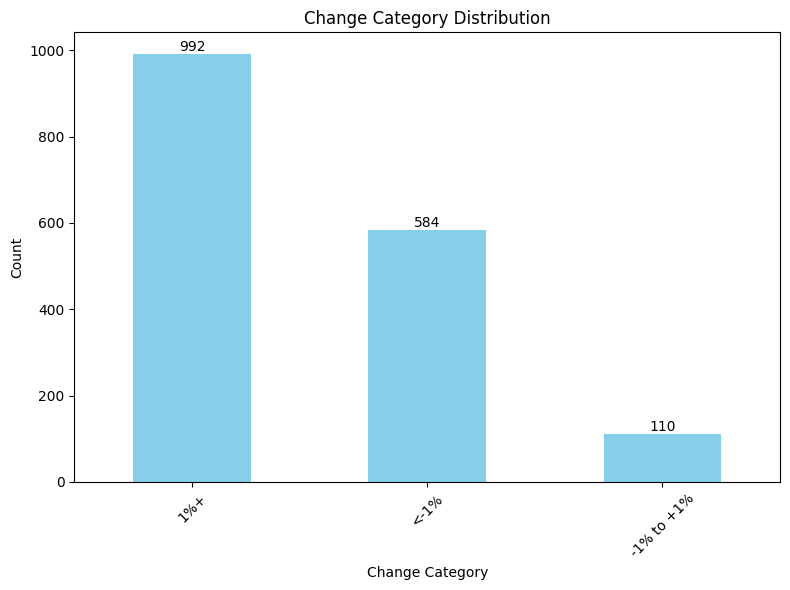

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame df_finances

# Count occurrences of each category
category_counts = df_finances['change-category'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
bars = category_counts.plot(kind='bar', color='skyblue')

# Add exact amounts on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{int(bar.get_height())}', ha='center', va='bottom')

plt.title('Change Category Distribution')
plt.xlabel('Change Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
company_tickers = ['msft', 'aapl', 'amzn']

df_texts = pd.DataFrame(columns=['file_name', 'date_str', 'text_id', 'title', 'content', 'ticker'])

for company_ticker in company_tickers:

    df = pd.read_csv(f'data-{company_ticker}.csv')
    df_texts = pd.concat([df_texts, df])

df_texts['combined_text'] = df_texts['title'] + '\n' + df_texts['content']

In [46]:
# Создаем новый DataFrame с рассчитанными данными
df_texts_stats = pd.DataFrame()

# Добавляем новые колонки с рассчитанными значениями
df_texts_stats['word_count'] = df_texts['combined_text'].str.split().str.len()
df_texts_stats['char_count'] = df_texts['combined_text'].str.len()
df_texts_stats['unique_word_count'] = df_texts['combined_text'].apply(lambda x: len(set(str(x).split())))

# Выводим получившийся DataFrame
df_texts_stats.describe()

,word_count,char_count,unique_word_count
count,32147.000000,32147.000000,32207.000000
mean,800.710393,4981.651818,386.337877
std,770.364714,5022.957945,261.715410
min,4.000000,16.000000,1.000000
25%,381.000000,2342.000000,221.000000
50%,586.000000,3626.000000,320.000000
75%,967.000000,5981.000000,484.000000
max,26041.000000,215937.000000,5612.000000


In [39]:
for i, elem in df_texts[df_texts['content'].str.split().str.len() < 20].iterrows():
    print(elem['combined_text'])
    print('=============================')

Lumen Technologies names former Microsoft exec as new CEO - Denver Business Journal - The Business Journals
Request unsuccessful. Incapsula incident ID: 1427000850590411423-441999070254536005
Microsoft plans $230 million data center project north of Castroville - San Antonio Business Journal - The Business Journals
Request unsuccessful. Incapsula incident ID: 480001270512501754-1023234327185465290
Microsoft data center advances in Mount Pleasant - Milwaukee Business Journal - The Business Journals
Request unsuccessful. Incapsula incident ID: 480001270512501754-1023172956397772746
Digital Markets Act: Commission designates six gatekeepers - European Commission
Press corner | European Commission
Microsoft unveiled its "super-powered" 365 Copilot at a Live virtual event - Innovation Village
Request unsuccessful. Incapsula incident ID: 144001250903526320-1441402243001622341
Epic and Microsoft Bring GPT-4 to EHRs | Epic - Epic Systems
Epic and Microsoft Bring GPT-4 to EHRs | Epic
Microsoft 

In [49]:
df_texts[df_texts['content'].str.split().str.len() < 30].shape

(79, 7)

In [50]:
df_texts = df_texts[df_texts['content'].str.split().str.len() >= 30]

In [51]:
# Создаем новый DataFrame с рассчитанными данными
df_texts_stats = pd.DataFrame()

# Добавляем новые колонки с рассчитанными значениями
df_texts_stats['word_count'] = df_texts['combined_text'].str.split().str.len()
df_texts_stats['char_count'] = df_texts['combined_text'].str.len()
df_texts_stats['unique_word_count'] = df_texts['combined_text'].apply(lambda x: len(set(str(x).split())))

# Выводим получившийся DataFrame
df_texts_stats.describe()

,word_count,char_count,unique_word_count
count,32068.000000,32068.000000,32068.000000
mean,802.620650,4993.465012,387.956343
std,770.349761,5023.491742,261.121314
min,44.000000,292.000000,22.000000
25%,383.000000,2349.750000,223.000000
50%,588.000000,3636.000000,321.000000
75%,968.000000,5989.000000,484.250000
max,26041.000000,215937.000000,5612.000000


In [52]:
df = df_texts.merge(df_finances, how = 'inner', on = ['ticker', 'date_str'])
df.sort_values('date_str', inplace = True)
df.dropna(inplace=True)

del df_texts, df_finances
df

,file_name,date_str,text_id,title,content,ticker,combined_text,Open,High,Low,...,Dividends_prev_5d,Dividends_prev_6d,Dividends_prev_7d,Dividends_prev_8d,Dividends_prev_9d,Dividends_prev_10d,Dividends_prev_11d,Dividends_prev_12d,Dividends_prev_13d,Dividends_prev_14d
5166,"Gaming for everyone, everywhere: our view on t...",2022-09-01,CBMiUGh0dHBzOi8vYmxvZ3MubWljcm9zb2Z0LmNvbS9vbi...,"Gaming for everyone, everywhere: our view on t...",Game developers around the world are creating ...,msft,"Gaming for everyone, everywhere: our view on t...",0.189439,0.187181,0.191226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.826667,0.0,0.0,0.0
20960,Deforestation spurs wave of fires in Brazilian...,2022-09-01,CBMiZmh0dHBzOi8vd3d3LmFsamF6ZWVyYS5jb20vbmV3cy...,Deforestation spurs wave of fires in Brazilian...,Deforestation spurs wave of fires in Brazilian...,amzn,Deforestation spurs wave of fires in Brazilian...,0.411742,0.419042,0.405746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3728,Windows Memory Diagnostic Review (A Free RAM T...,2022-09-01,CBMiQWh0dHBzOi8vd3d3LmxpZmV3aXJlLmNvbS93aW5kb3...,Windows Memory Diagnostic Review (A Free RAM T...,Software & Apps > Windows Windows Memory Diagn...,msft,Windows Memory Diagnostic Review (A Free RAM T...,0.189439,0.187181,0.191226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.826667,0.0,0.0,0.0
28685,Police at Amazon facility threaten to arrest u...,2022-09-01,CBMibWh0dHBzOi8vdGVjaGNydW5jaC5jb20vMjAyMi8wOS...,Police at Amazon facility threaten to arrest u...,Police at Amazon facility threaten to arrest u...,amzn,Police at Amazon facility threaten to arrest u...,0.411742,0.419042,0.405746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
21684,Amazon Echo Show Guide | Alexa Tips & Tricks 2...,2022-09-01,CBMiVWh0dHBzOi8vd3d3LnBvcHVsYXJtZWNoYW5pY3MuY2...,Amazon Echo Show Guide | Alexa Tips & Tricks 2...,Amazon’s Echo Show is an Alexa smart speaker w...,amzn,Amazon Echo Show Guide | Alexa Tips & Tricks 2...,0.411742,0.419042,0.405746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15207,Apple job postings grow in August as company e...,2023-09-29,CBMiowFodHRwczovL3RlbGVjb20uZWNvbm9taWN0aW1lcy...,Apple job postings grow in August as company e...,- Devices\n- 2 min read\nApple job postings gr...,aapl,Apple job postings grow in August as company e...,0.639304,0.630959,0.634330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
19957,Jumbo-Visma To Be Backed by Amazon! Primož Ro...,2023-09-29,CBMihQFodHRwczovL3d3dy5iaWN5Y2xpbmcuY29tL3JhY2...,Jumbo-Visma To Be Backed by Amazon! Primož Rog...,Not long after riding the final stage of the V...,amzn,Jumbo-Visma To Be Backed by Amazon! Primož Rog...,0.432711,0.429673,0.431303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
393,Mayo Clinic the first to leverage Microsoft 36...,2023-09-29,CBMiSmh0dHBzOi8vZXJwLnRvZGF5L21heW8tY2xpbmljLX...,Mayo Clinic the first to leverage Microsoft 36...,Mayo Clinic is one of the first healthcare org...,msft,Mayo Clinic the first to leverage Microsoft 36...,0.473459,0.472329,0.476438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7897,Upgrade to Windows 11 Pro and get Microsoft Of...,2023-09-29,CBMia2h0dHBzOi8vd3d3LnBjd29ybGQuY29tL2FydGljbG...,Upgrade to Windows 11 Pro and get Microsoft Of...,Everyone wants to run the best software and pr...,msft,Upgrade to Windows 11 Pro and get Microsoft Of...,0.473459,0.472329,0.476438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features = 500, stop_words = 'english', lowercase = True)
# tfidf_vectorizer = CountVectorizer(max_features = 500)
tfidf_vectorizer.fit(df['title'])
tfidf_vectorizer.fit(df['content'])

# Transform text to TF-IDF features
title_tfidf = tfidf_vectorizer.transform(df['title'])
content_tfidf = tfidf_vectorizer.transform(df['content'])
# combined_text_tfidf = tfidf_vectorizer.fit_transform(df['combined_text'])

# Convert TF-IDF matrices to DataFrames
# title_tfidf_df = pd.DataFrame(title_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# content_tfidf_df = pd.DataFrame(content_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# combined_text_tfidf_df = pd.DataFrame(combined_text_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Get the feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Append "_title" and "_content" to the feature names
title_feature_names = [name + "_title" for name in feature_names]
content_feature_names = [name + "_content" for name in feature_names]

# Create DataFrames with modified column names
title_tfidf_df = pd.DataFrame(title_tfidf.toarray(), columns=title_feature_names)
content_tfidf_df = pd.DataFrame(content_tfidf.toarray(), columns=content_feature_names)

# Create a copy and efficiently add TF-IDF features
df = pd.concat([df, title_tfidf_df, content_tfidf_df], axis=1)
# df = pd.concat([df, content_tfidf_df], axis=1)

# Example code for saving (modify as needed)
# df_copy.to_csv('updated_data.csv', index=False)

df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)
df.shape

(28972, 1101)

In [54]:
del title_tfidf_df, content_tfidf_df

In [55]:
df.head()

,file_name,date_str,text_id,title,content,ticker,combined_text,Open,High,Low,...,won_content,word_content,work_content,workers_content,working_content,works_content,world_content,xbox_content,year_content,years_content
0,"Gaming for everyone, everywhere: our view on t...",2022-09-01,CBMiUGh0dHBzOi8vYmxvZ3MubWljcm9zb2Z0LmNvbS9vbi...,"Gaming for everyone, everywhere: our view on t...",Game developers around the world are creating ...,msft,"Gaming for everyone, everywhere: our view on t...",0.189439,0.187181,0.191226,...,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000
1,Deforestation spurs wave of fires in Brazilian...,2022-09-01,CBMiZmh0dHBzOi8vd3d3LmFsamF6ZWVyYS5jb20vbmV3cy...,Deforestation spurs wave of fires in Brazilian...,Deforestation spurs wave of fires in Brazilian...,amzn,Deforestation spurs wave of fires in Brazilian...,0.411742,0.419042,0.405746,...,0.0,0.032061,0.053797,0.0,0.02132,0.0,0.018940,0.0,0.0,0.105115
2,Windows Memory Diagnostic Review (A Free RAM T...,2022-09-01,CBMiQWh0dHBzOi8vd3d3LmxpZmV3aXJlLmNvbS93aW5kb3...,Windows Memory Diagnostic Review (A Free RAM T...,Software & Apps > Windows Windows Memory Diagn...,msft,Windows Memory Diagnostic Review (A Free RAM T...,0.189439,0.187181,0.191226,...,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000
3,Police at Amazon facility threaten to arrest u...,2022-09-01,CBMibWh0dHBzOi8vdGVjaGNydW5jaC5jb20vMjAyMi8wOS...,Police at Amazon facility threaten to arrest u...,Police at Amazon facility threaten to arrest u...,amzn,Police at Amazon facility threaten to arrest u...,0.411742,0.419042,0.405746,...,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.033321
4,Amazon Echo Show Guide | Alexa Tips & Tricks 2...,2022-09-01,CBMiVWh0dHBzOi8vd3d3LnBvcHVsYXJtZWNoYW5pY3MuY2...,Amazon Echo Show Guide | Alexa Tips & Tricks 2...,Amazon’s Echo Show is an Alexa smart speaker w...,amzn,Amazon Echo Show Guide | Alexa Tips & Tricks 2...,0.411742,0.419042,0.405746,...,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.090199,0.0,0.0,0.041716


# Modeling TF-IDF

In [56]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [57]:
df

,file_name,date_str,text_id,title,content,ticker,combined_text,Open,High,Low,...,won_content,word_content,work_content,workers_content,working_content,works_content,world_content,xbox_content,year_content,years_content
0,"Gaming for everyone, everywhere: our view on t...",2022-09-01,CBMiUGh0dHBzOi8vYmxvZ3MubWljcm9zb2Z0LmNvbS9vbi...,"Gaming for everyone, everywhere: our view on t...",Game developers around the world are creating ...,msft,"Gaming for everyone, everywhere: our view on t...",0.189439,0.187181,0.191226,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,Deforestation spurs wave of fires in Brazilian...,2022-09-01,CBMiZmh0dHBzOi8vd3d3LmFsamF6ZWVyYS5jb20vbmV3cy...,Deforestation spurs wave of fires in Brazilian...,Deforestation spurs wave of fires in Brazilian...,amzn,Deforestation spurs wave of fires in Brazilian...,0.411742,0.419042,0.405746,...,0.000000,0.032061,0.053797,0.0,0.021320,0.0,0.018940,0.000000,0.000000,0.105115
2,Windows Memory Diagnostic Review (A Free RAM T...,2022-09-01,CBMiQWh0dHBzOi8vd3d3LmxpZmV3aXJlLmNvbS93aW5kb3...,Windows Memory Diagnostic Review (A Free RAM T...,Software & Apps > Windows Windows Memory Diagn...,msft,Windows Memory Diagnostic Review (A Free RAM T...,0.189439,0.187181,0.191226,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,Police at Amazon facility threaten to arrest u...,2022-09-01,CBMibWh0dHBzOi8vdGVjaGNydW5jaC5jb20vMjAyMi8wOS...,Police at Amazon facility threaten to arrest u...,Police at Amazon facility threaten to arrest u...,amzn,Police at Amazon facility threaten to arrest u...,0.411742,0.419042,0.405746,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.033321
4,Amazon Echo Show Guide | Alexa Tips & Tricks 2...,2022-09-01,CBMiVWh0dHBzOi8vd3d3LnBvcHVsYXJtZWNoYW5pY3MuY2...,Amazon Echo Show Guide | Alexa Tips & Tricks 2...,Amazon’s Echo Show is an Alexa smart speaker w...,amzn,Amazon Echo Show Guide | Alexa Tips & Tricks 2...,0.411742,0.419042,0.405746,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.090199,0.000000,0.000000,0.041716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28967,Apple job postings grow in August as company e...,2023-09-29,CBMiowFodHRwczovL3RlbGVjb20uZWNvbm9taWN0aW1lcy...,Apple job postings grow in August as company e...,- Devices\n- 2 min read\nApple job postings gr...,aapl,Apple job postings grow in August as company e...,0.639304,0.630959,0.634330,...,0.079229,0.000000,0.018106,0.0,0.000000,0.0,0.019123,0.000000,0.122174,0.000000
28968,Jumbo-Visma To Be Backed by Amazon! Primož Ro...,2023-09-29,CBMihQFodHRwczovL3d3dy5iaWN5Y2xpbmcuY29tL3JhY2...,Jumbo-Visma To Be Backed by Amazon! Primož Rog...,Not long after riding the final stage of the V...,amzn,Jumbo-Visma To Be Backed by Amazon! Primož Rog...,0.432711,0.429673,0.431303,...,0.000000,0.000000,0.023808,0.0,0.009435,0.0,0.020955,0.000000,0.010041,0.003877
28969,Mayo Clinic the first to leverage Microsoft 36...,2023-09-29,CBMiSmh0dHBzOi8vZXJwLnRvZGF5L21heW8tY2xpbmljLX...,Mayo Clinic the first to leverage Microsoft 36...,Mayo Clinic is one of the first healthcare org...,msft,Mayo Clinic the first to leverage Microsoft 36...,0.473459,0.472329,0.476438,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
28970,Upgrade to Windows 11 Pro and get Microsoft Of...,2023-09-29,CBMia2h0dHBzOi8vd3d3LnBjd29ybGQuY29tL2FydGljbG...,Upgrade to Windows 11 Pro and get Microsoft Of...,Everyone wants to run the best software and pr...,msft,Upgrade to Windows 11 Pro and get Microsoft Of...,0.473459,0.472329,0.476438,...,0.000000,0.000000,0.025676,0.0,0.000000,0.0,0.081357,0.362704,0.043315,0.025085


## Random Forest

### Finances

In [87]:
y = df['change-category']

# Преобразование текстовых значений в числовые для целевой переменной
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Разделение данных на тренировочный и тестовый наборы
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=11)

train_size = 0.8
val_size = 0.1
test_size = 0.1

# Определяем индексы для разделения
train_end = int(df.shape[0] * train_size)
val_end = train_end + int(df.shape[0] * val_size)

# Делим на обучающую, валидационную и тестовую выборки
X_train = df.iloc[:train_end, 17:101]
X_val = df.iloc[train_end:val_end, 17:101]
X_test = df.iloc[val_end:, 17:101]

y_train = y_encoded[:train_end]
y_val = y_encoded[train_end:val_end]
y_test = y_encoded[val_end:]

In [88]:
X_train.shape, X_val.shape, X_test.shape

((23177, 84), (2897, 84), (2898, 84))

In [92]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm_notebook

# Предположим, что X_train, X_test, y_train, y_test уже определены
# label_encoder используется для перевода меток в текстовый формат, если метки кодированы
# label_encoder = LabelEncoder() (если у вас текстовые метки)

# Количество запусков с разными random seed
n_runs = 15

# Список для хранения результатов
results = []

# Запускаем цикл для обучения с разными random seed
for i in tqdm_notebook(range(n_runs)):
    np.random.seed(i)
    random_seed = np.random.randint(0, 10000)  # Генерируем случайный seed

    # Инициализация RandomForestClassifier с текущим random seed
    rf_classifier = RandomForestClassifier(
        n_estimators=400,
        criterion='entropy',
        min_samples_split=23,
        min_samples_leaf=21,
        max_depth=16,
        random_state=random_seed,  # Используем новый random seed
        n_jobs=-1,
        # verbose=10
    )

    # Обучение модели
    rf_classifier.fit(X_train, y_train)

    # Предсказание на тестовом наборе
    y_pred = rf_classifier.predict(X_test)

    # Оценка точности модели
    accuracy = accuracy_score(y_test, y_pred)

    # Генерация отчета по классификации
    class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)  # Преобразуем в словарь для дальнейшего использования

    # Сохраняем результаты для текущего random seed
    results.append({
        'Model': 'RandomForestClassifier',
        'Random Seed': random_seed,
        'Accuracy': accuracy,
        'Precision (macro avg)': class_report['macro avg']['precision'],
        'Recall (macro avg)': class_report['macro avg']['recall'],
        'F1-Score (macro avg)': class_report['macro avg']['f1-score'],
        'Precision (weighted avg)': class_report['weighted avg']['precision'],
        'Recall (weighted avg)': class_report['weighted avg']['recall'],
        'F1-Score (weighted avg)': class_report['weighted avg']['f1-score'],
    })

# Преобразуем список результатов в DataFrame
df_results = pd.DataFrame(results)

# Сохраняем DataFrame в CSV файл
df_results.to_csv('results/rf_classifier_results_finance.csv', index=False)

<ipython-input-92-b343acefb927>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(n_runs)):


  0%|          | 0/15 [00:00<?, ?it/s]

In [93]:
df_results.iloc[:, 2:].agg(['min', 'max', 'median'])

,Accuracy,Precision (macro avg),Recall (macro avg),F1-Score (macro avg),Precision (weighted avg),Recall (weighted avg),F1-Score (weighted avg)
min,0.473430,0.358159,0.492712,0.273091,0.942143,0.473430,0.620511
max,0.531746,0.363511,0.512903,0.296356,0.944685,0.531746,0.671824
median,0.498620,0.361686,0.501434,0.281744,0.943273,0.498620,0.643115


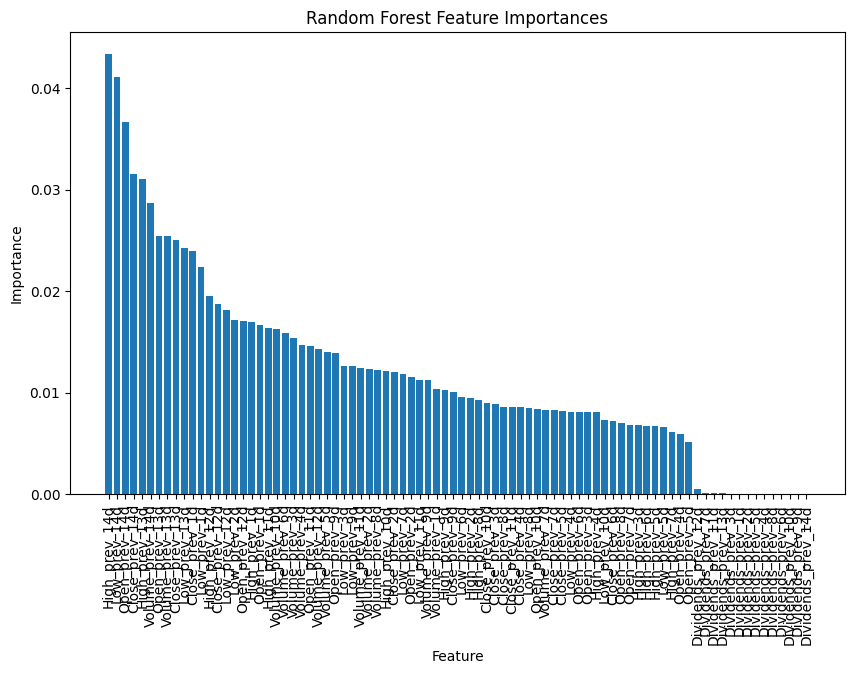

In [94]:
import matplotlib.pyplot as plt

# Assuming rf_classifier is your trained Random Forest classifier
feature_importances = rf_classifier.feature_importances_

# Get the names of the features
feature_names = X_train.columns  # Assuming df is your DataFrame with features

# Sort the features by their importances
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting the most important features
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()


### Finances+News

In [95]:
train_size = 0.8
val_size = 0.1
test_size = 0.1

# Определяем индексы для разделения
train_end = int(df.shape[0] * train_size)
val_end = train_end + int(df.shape[0] * val_size)

# Делим на обучающую, валидационную и тестовую выборки
X_train = df.iloc[:train_end, 17:]
X_val = df.iloc[train_end:val_end, 17:]
X_test = df.iloc[val_end:, 17:]

y_train = y_encoded[:train_end]
y_val = y_encoded[train_end:val_end]
y_test = y_encoded[val_end:]

# Количество запусков с разными random seed
n_runs = 15

# Список для хранения результатов
results = []

# Запускаем цикл для обучения с разными random seed
for i in tqdm_notebook(range(n_runs)):
    np.random.seed(i)
    random_seed = np.random.randint(0, 10000)  # Генерируем случайный seed

    # Инициализация RandomForestClassifier с текущим random seed
    rf_classifier = RandomForestClassifier(
        n_estimators=400,
        criterion='entropy',
        min_samples_split=23,
        min_samples_leaf=21,
        max_depth=16,
        random_state=random_seed,  # Используем новый random seed
        n_jobs=-1,
        # verbose=10
    )

    # Обучение модели
    rf_classifier.fit(X_train, y_train)

    # Предсказание на тестовом наборе
    y_pred = rf_classifier.predict(X_test)

    # Оценка точности модели
    accuracy = accuracy_score(y_test, y_pred)

    # Генерация отчета по классификации
    class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)  # Преобразуем в словарь для дальнейшего использования

    # Сохраняем результаты для текущего random seed
    results.append({
        'Model': 'RandomForestClassifier',
        'Random Seed': random_seed,
        'Accuracy': accuracy,
        'Precision (macro avg)': class_report['macro avg']['precision'],
        'Recall (macro avg)': class_report['macro avg']['recall'],
        'F1-Score (macro avg)': class_report['macro avg']['f1-score'],
        'Precision (weighted avg)': class_report['weighted avg']['precision'],
        'Recall (weighted avg)': class_report['weighted avg']['recall'],
        'F1-Score (weighted avg)': class_report['weighted avg']['f1-score'],
    })

# Преобразуем список результатов в DataFrame
df_results = pd.DataFrame(results)

# Сохраняем DataFrame в CSV файл
df_results.to_csv('results/rf_classifier_results_finance_news.csv', index=False)

<ipython-input-95-6f494b85ed1c>:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(n_runs)):


  0%|          | 0/15 [00:00<?, ?it/s]

In [96]:
df_results.iloc[:, 2:].agg(['min', 'max', 'median'])

,Accuracy,Precision (macro avg),Recall (macro avg),F1-Score (macro avg),Precision (weighted avg),Recall (weighted avg),F1-Score (weighted avg)
min,0.632850,0.359116,0.547909,0.319102,0.947854,0.632850,0.751623
max,0.651829,0.375106,0.554480,0.346915,0.948734,0.651829,0.766107
median,0.642512,0.364714,0.551254,0.328457,0.948070,0.642512,0.758347


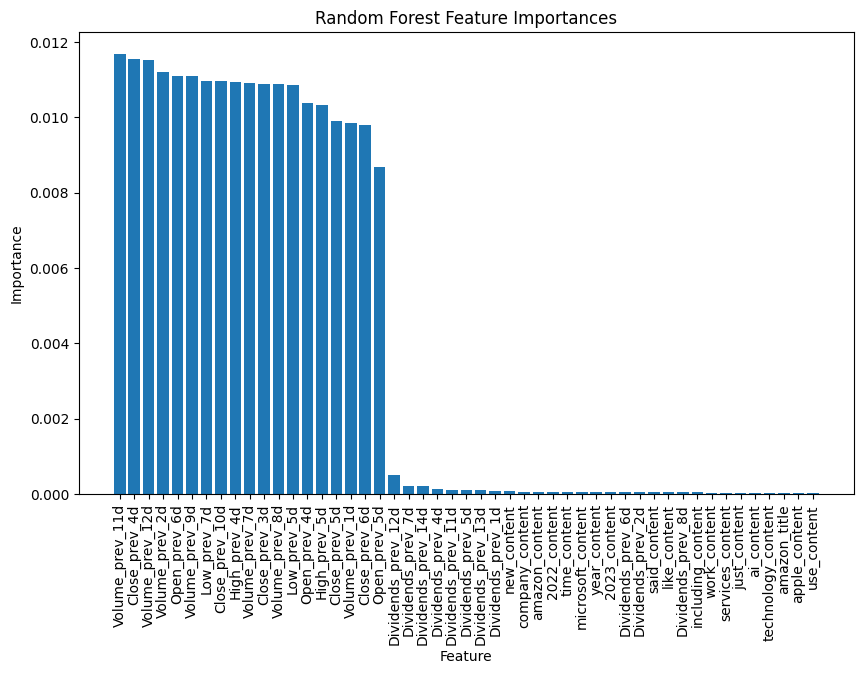

In [97]:
import matplotlib.pyplot as plt

# Assuming rf_classifier is your trained Random Forest classifier
feature_importances = rf_classifier.feature_importances_

# Get the names of the features
feature_names = X_train.columns  # Assuming df is your DataFrame with features

# Sort the features by their importances
sorted_indices = feature_importances.argsort()[::-1][51:100]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting the most important features
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

### Wilcoxon test

In [98]:
from scipy.stats import wilcoxon
import pandas as pd

df_results_with_news = pd.read_csv("/content/results/rf_classifier_results_finance_news.csv")
df_results_without_news = pd.read_csv("/content/results/rf_classifier_results_finance.csv")

# Например, сравним метрику accuracy
accuracy_with_news = df_results_with_news['Accuracy']
accuracy_without_news = df_results_without_news['Accuracy']

# Применяем Wilcoxon signed-rank test
stat, p_value = wilcoxon(accuracy_with_news, accuracy_without_news)

# Выводим результаты теста
print(f'Wilcoxon test statistic: {stat}')
print(f'P-value: {p_value}')

# Проверка на статистическую значимость
alpha = 0.05
if p_value < alpha:
    print('The difference between the models is statistically significant.')
else:
    print('The difference between the models is not statistically significant.')


Wilcoxon test statistic: 0.0
P-value: 6.103515625e-05
Различие между моделями статистически значимо.


## Logistic Regression

### Finances

In [99]:
y = df['change-category']

# Преобразование текстовых значений в числовые для целевой переменной
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Разделение данных на тренировочный и тестовый наборы
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=11)

train_size = 0.8
val_size = 0.1
test_size = 0.1

# Определяем индексы для разделения
train_end = int(df.shape[0] * train_size)
val_end = train_end + int(df.shape[0] * val_size)

# Делим на обучающую, валидационную и тестовую выборки
X_train = df.iloc[:train_end, 17:101]
X_val = df.iloc[train_end:val_end, 17:101]
X_test = df.iloc[val_end:, 17:101]

y_train = y_encoded[:train_end]
y_val = y_encoded[train_end:val_end]
y_test = y_encoded[val_end:]

In [111]:
from sklearn.linear_model import LogisticRegression

# Количество запусков с разными random seed
n_runs = 15

# Список для хранения результатов
results = []

# Запускаем цикл для обучения с разными random seed
for i in tqdm_notebook(range(n_runs)):
    np.random.seed(i)
    random_seed = np.random.randint(0, 10000)  # Генерируем случайный seed

    # Инициализация LogisticRegression с текущим random seed
    lr_classifier = LogisticRegression(max_iter=1000, random_state=random_seed)

    # Обучение модели
    lr_classifier.fit(X_train, y_train)

    # Предсказание на тестовом наборе
    y_pred = lr_classifier.predict(X_test)

    # Оценка точности модели
    accuracy = accuracy_score(y_test, y_pred)

    # Генерация отчета по классификации
    class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)  # Преобразуем в словарь для дальнейшего использования

    # Сохраняем результаты для текущего random seed
    results.append({
        'Model': 'LogisticRegression',
        'Random Seed': random_seed,
        'Accuracy': accuracy,
        'Precision (macro avg)': class_report['macro avg']['precision'],
        'Recall (macro avg)': class_report['macro avg']['recall'],
        'F1-Score (macro avg)': class_report['macro avg']['f1-score'],
        'Precision (weighted avg)': class_report['weighted avg']['precision'],
        'Recall (weighted avg)': class_report['weighted avg']['recall'],
        'F1-Score (weighted avg)': class_report['weighted avg']['f1-score'],
    })

# Преобразуем список результатов в DataFrame
df_results = pd.DataFrame(results)

# Сохраняем DataFrame в CSV файл
df_results.to_csv('results/lr_classifier_results_finance.csv', index=False)

<ipython-input-111-e64ebce8ca8d>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(n_runs)):


  0%|          | 0/15 [00:00<?, ?it/s]

In [112]:
df_results.iloc[:, 2:].agg(['min', 'max', 'median'])

,Accuracy,Precision (macro avg),Recall (macro avg),F1-Score (macro avg),Precision (weighted avg),Recall (weighted avg),F1-Score (weighted avg)
min,0.382333,0.331794,0.378426,0.20046,0.92999,0.382333,0.524544
max,0.382333,0.331794,0.378426,0.20046,0.92999,0.382333,0.524544
median,0.382333,0.331794,0.378426,0.20046,0.92999,0.382333,0.524544


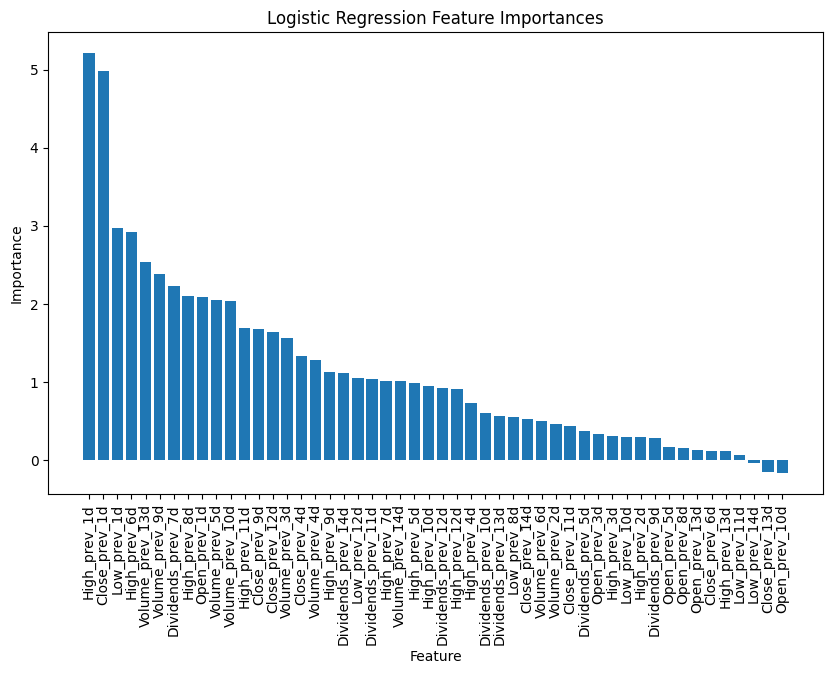

In [113]:
import matplotlib.pyplot as plt

# Assuming lr_classifier is your trained Logistic Regression classifier
feature_importances = lr_classifier.coef_[0]

# Get the names of the features
feature_names = X_train.columns  # Assuming X_train is your training data

# Sort the features by their importances
sorted_indices = feature_importances.argsort()[::-1][:50]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting the most important features
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Logistic Regression Feature Importances')
plt.show()


### Finances+News

In [114]:
train_size = 0.8
val_size = 0.1
test_size = 0.1

# Определяем индексы для разделения
train_end = int(df.shape[0] * train_size)
val_end = train_end + int(df.shape[0] * val_size)

# Делим на обучающую, валидационную и тестовую выборки
X_train = df.iloc[:train_end, 17:]
X_val = df.iloc[train_end:val_end, 17:]
X_test = df.iloc[val_end:, 17:]

y_train = y_encoded[:train_end]
y_val = y_encoded[train_end:val_end]
y_test = y_encoded[val_end:]

from sklearn.linear_model import LogisticRegression

# Количество запусков с разными random seed
n_runs = 15

# Список для хранения результатов
results = []

# Запускаем цикл для обучения с разными random seed
for i in tqdm_notebook(range(n_runs)):
    np.random.seed(i)
    random_seed = np.random.randint(0, 10000)  # Генерируем случайный seed

    # Инициализация LogisticRegression с текущим random seed
    lr_classifier = LogisticRegression(max_iter=1000, random_state=random_seed)

    # Обучение модели
    lr_classifier.fit(X_train, y_train)

    # Предсказание на тестовом наборе
    y_pred = lr_classifier.predict(X_test)

    # Оценка точности модели
    accuracy = accuracy_score(y_test, y_pred)

    # Генерация отчета по классификации
    class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)  # Преобразуем в словарь для дальнейшего использования

    # Сохраняем результаты для текущего random seed
    results.append({
        'Model': 'LogisticRegression',
        'Random Seed': random_seed,
        'Accuracy': accuracy,
        'Precision (macro avg)': class_report['macro avg']['precision'],
        'Recall (macro avg)': class_report['macro avg']['recall'],
        'F1-Score (macro avg)': class_report['macro avg']['f1-score'],
        'Precision (weighted avg)': class_report['weighted avg']['precision'],
        'Recall (weighted avg)': class_report['weighted avg']['recall'],
        'F1-Score (weighted avg)': class_report['weighted avg']['f1-score'],
    })

# Преобразуем список результатов в DataFrame
df_results = pd.DataFrame(results)

# Сохраняем DataFrame в CSV файл
df_results.to_csv('results/lr_classifier_results_finance_news.csv', index=False)

<ipython-input-114-0911bcf610ab>:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(n_runs)):


  0%|          | 0/15 [00:00<?, ?it/s]

In [115]:
df_results.iloc[:, 2:].agg(['min', 'max', 'median'])

,Accuracy,Precision (macro avg),Recall (macro avg),F1-Score (macro avg),Precision (weighted avg),Recall (weighted avg),F1-Score (weighted avg)
min,0.419255,0.353064,0.411893,0.237143,0.942265,0.419255,0.564281
max,0.419255,0.353064,0.411893,0.237143,0.942265,0.419255,0.564281
median,0.419255,0.353064,0.411893,0.237143,0.942265,0.419255,0.564281


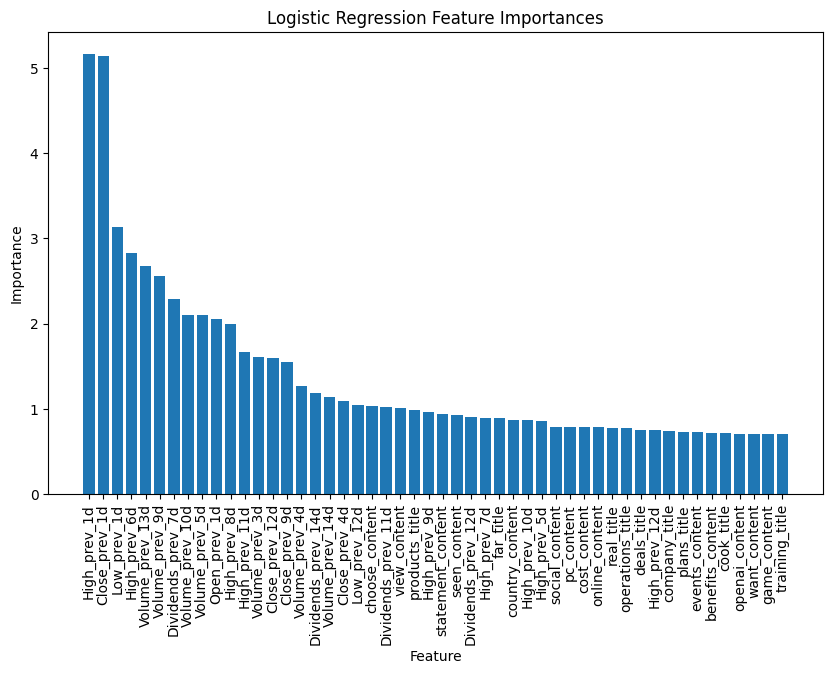

In [116]:
import matplotlib.pyplot as plt

# Assuming lr_classifier is your trained Logistic Regression classifier
feature_importances = lr_classifier.coef_[0]

# Get the names of the features
feature_names = X_train.columns  # Assuming X_train is your training data

# Sort the features by their importances
sorted_indices = feature_importances.argsort()[::-1][:50]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting the most important features
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Logistic Regression Feature Importances')
plt.show()

### Wilcoxon test

In [117]:
from scipy.stats import wilcoxon
import pandas as pd

df_results_with_news = pd.read_csv("/content/results/lr_classifier_results_finance_news.csv")
df_results_without_news = pd.read_csv("/content/results/lr_classifier_results_finance.csv")

# Например, сравним метрику accuracy
accuracy_with_news = df_results_with_news['Accuracy']
accuracy_without_news = df_results_without_news['Accuracy']

# Применяем Wilcoxon signed-rank test
stat, p_value = wilcoxon(accuracy_with_news, accuracy_without_news)

# Выводим результаты теста
print(f'Wilcoxon test statistic: {stat}')
print(f'P-value: {p_value}')

# Проверка на статистическую значимость
alpha = 0.05
if p_value < alpha:
    print('The difference between the models is statistically significant.')
else:
    print('The difference between the models is not statistically significant.')


Wilcoxon test statistic: 0.0
P-value: 6.103515625e-05
The difference between the models is statistically significant.


## Catboost Classifier

In [118]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.9 MB/s eta 0:00:00


### Finances

In [126]:
y = df['change-category']

# Преобразование текстовых значений в числовые для целевой переменной
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Разделение данных на тренировочный и тестовый наборы
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=11)

train_size = 0.8
val_size = 0.1
test_size = 0.1

# Определяем индексы для разделения
train_end = int(df.shape[0] * train_size)
val_end = train_end + int(df.shape[0] * val_size)

# Делим на обучающую, валидационную и тестовую выборки
X_train = df.iloc[:train_end, 17:101]
X_val = df.iloc[train_end:val_end, 17:101]
X_test = df.iloc[val_end:, 17:101]

y_train = y_encoded[:train_end]
y_val = y_encoded[train_end:val_end]
y_test = y_encoded[val_end:]

In [127]:
from catboost import CatBoostClassifier

# Количество запусков с разными random seed
n_runs = 15

# Список для хранения результатов
results = []

# Запускаем цикл для обучения с разными random seed
for i in tqdm_notebook(range(n_runs)):
    np.random.seed(i)
    random_seed = np.random.randint(0, 10000)  # Генерируем случайный seed

    # Инициализация CatBoostClassifier с текущим random seed
    cb_classifier = CatBoostClassifier(
                    iterations=100,
                    use_best_model = False,
                    depth=3,
                    learning_rate=0.007,
                    loss_function='MultiClass',
                    eval_metric='Accuracy',
                    random_seed=random_seed,
                    colsample_bylevel = int(np.sqrt(X_train.shape[1])) / X_train.shape[1])

    # Обучение модели
    cb_classifier.fit(X_train, y_train)

    # Предсказание на тестовом наборе
    y_pred = cb_classifier.predict(X_test)

    # Оценка точности модели
    accuracy = accuracy_score(y_test, y_pred)

    # Генерация отчета по классификации
    class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)  # Преобразуем в словарь для дальнейшего использования

    # Сохраняем результаты для текущего random seed
    results.append({
        'Model': 'CatBoostClassifier',
        'Random Seed': random_seed,
        'Accuracy': accuracy,
        'Precision (macro avg)': class_report['macro avg']['precision'],
        'Recall (macro avg)': class_report['macro avg']['recall'],
        'F1-Score (macro avg)': class_report['macro avg']['f1-score'],
        'Precision (weighted avg)': class_report['weighted avg']['precision'],
        'Recall (weighted avg)': class_report['weighted avg']['recall'],
        'F1-Score (weighted avg)': class_report['weighted avg']['f1-score'],
    })

# Преобразуем список результатов в DataFrame
df_results = pd.DataFrame(results)

# Сохраняем DataFrame в CSV файл
df_results.to_csv('results/cb_classifier_results_finance.csv', index=False)

<ipython-input-127-d752b647fcf2>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(n_runs)):


  0%|          | 0/15 [00:00<?, ?it/s]

0:	learn: 0.8472624	total: 10.3ms	remaining: 1.02s
1:	learn: 0.8625793	total: 19.6ms	remaining: 962ms
2:	learn: 0.8591276	total: 30.2ms	remaining: 977ms
3:	learn: 0.8475212	total: 41.3ms	remaining: 991ms
4:	learn: 0.8589550	total: 52.7ms	remaining: 1s
5:	learn: 0.8699573	total: 63.1ms	remaining: 988ms
6:	learn: 0.8621478	total: 73.4ms	remaining: 975ms
7:	learn: 0.8610692	total: 84.4ms	remaining: 970ms
8:	learn: 0.8659878	total: 93.7ms	remaining: 947ms
9:	learn: 0.8487725	total: 104ms	remaining: 932ms
10:	learn: 0.8487725	total: 114ms	remaining: 925ms
11:	learn: 0.8608103	total: 125ms	remaining: 914ms
12:	learn: 0.8608103	total: 135ms	remaining: 901ms
13:	learn: 0.8483410	total: 147ms	remaining: 902ms
14:	learn: 0.8510592	total: 158ms	remaining: 894ms
15:	learn: 0.8433361	total: 169ms	remaining: 887ms
16:	learn: 0.8433361	total: 184ms	remaining: 896ms
17:	learn: 0.8399275	total: 202ms	remaining: 922ms
18:	learn: 0.8363464	total: 222ms	remaining: 947ms
19:	learn: 0.8347068	total: 239ms	r

In [128]:
df_results.iloc[:, 2:].agg(['min', 'max', 'median'])

,Accuracy,Precision (macro avg),Recall (macro avg),F1-Score (macro avg),Precision (weighted avg),Recall (weighted avg),F1-Score (weighted avg)
min,0.825397,0.318933,0.285783,0.301449,0.921143,0.825397,0.870645
max,0.862319,0.346657,0.400700,0.343801,0.945856,0.862319,0.899742
median,0.834023,0.324063,0.292354,0.307393,0.935635,0.834023,0.881209


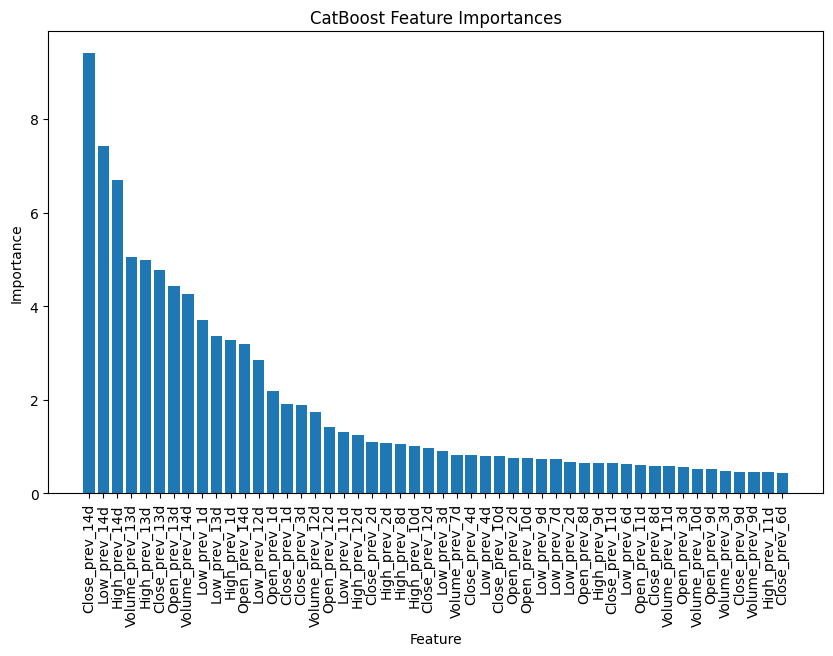

In [129]:
import matplotlib.pyplot as plt

# Assuming cb_classifier is your trained CatBoost classifier
feature_importances = cb_classifier.get_feature_importance()

# Get the names of the features
feature_names = X_train.columns  # Assuming X_train is your training data

# Sort the features by their importances
sorted_indices = feature_importances.argsort()[::-1][:50]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting the most important features
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('CatBoost Feature Importances')
plt.show()

### Finances+News

In [130]:
y = df['change-category']

# Преобразование текстовых значений в числовые для целевой переменной
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Разделение данных на тренировочный и тестовый наборы
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=11)

train_size = 0.8
val_size = 0.1
test_size = 0.1

# Определяем индексы для разделения
train_end = int(df.shape[0] * train_size)
val_end = train_end + int(df.shape[0] * val_size)

# Делим на обучающую, валидационную и тестовую выборки
X_train = df.iloc[:train_end, 17:]
X_val = df.iloc[train_end:val_end, 17:]
X_test = df.iloc[val_end:, 17:]

y_train = y_encoded[:train_end]
y_val = y_encoded[train_end:val_end]
y_test = y_encoded[val_end:]

In [132]:
# Количество запусков с разными random seed
n_runs = 15

# Список для хранения результатов
results = []

# Запускаем цикл для обучения с разными random seed
for i in tqdm_notebook(range(n_runs)):
    np.random.seed(i)
    random_seed = np.random.randint(0, 10000)  # Генерируем случайный seed

    # Инициализация CatBoostClassifier с текущим random seed
    cb_classifier = CatBoostClassifier(
                    iterations=100,
                    use_best_model = False,
                    depth=3,
                    learning_rate=0.007,
                    loss_function='MultiClass',
                    eval_metric='Accuracy',
                    random_seed=random_seed,
                    colsample_bylevel = int(np.sqrt(X_train.shape[1])) / X_train.shape[1])

    # Обучение модели
    cb_classifier.fit(X_train, y_train)

    # Предсказание на тестовом наборе
    y_pred = cb_classifier.predict(X_test)

    # Оценка точности модели
    accuracy = accuracy_score(y_test, y_pred)

    # Генерация отчета по классификации
    class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)  # Преобразуем в словарь для дальнейшего использования

    # Сохраняем результаты для текущего random seed
    results.append({
        'Model': 'CatBoostClassifier',
        'Random Seed': random_seed,
        'Accuracy': accuracy,
        'Precision (macro avg)': class_report['macro avg']['precision'],
        'Recall (macro avg)': class_report['macro avg']['recall'],
        'F1-Score (macro avg)': class_report['macro avg']['f1-score'],
        'Precision (weighted avg)': class_report['weighted avg']['precision'],
        'Recall (weighted avg)': class_report['weighted avg']['recall'],
        'F1-Score (weighted avg)': class_report['weighted avg']['f1-score'],
    })

# Преобразуем список результатов в DataFrame
df_results = pd.DataFrame(results)

# Сохраняем DataFrame в CSV файл
df_results.to_csv('results/cb_classifier_results_finance_news.csv', index=False)

<ipython-input-132-178229aac5d6>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(n_runs)):


  0%|          | 0/15 [00:00<?, ?it/s]

0:	learn: 0.8066186	total: 28.1ms	remaining: 2.79s
1:	learn: 0.8255598	total: 55.4ms	remaining: 2.71s
2:	learn: 0.8255598	total: 87.1ms	remaining: 2.81s
3:	learn: 0.8255598	total: 118ms	remaining: 2.84s
4:	learn: 0.8255598	total: 150ms	remaining: 2.85s
5:	learn: 0.8255598	total: 183ms	remaining: 2.87s
6:	learn: 0.8255598	total: 212ms	remaining: 2.82s
7:	learn: 0.8255598	total: 260ms	remaining: 2.99s
8:	learn: 0.8255598	total: 297ms	remaining: 3.01s
9:	learn: 0.8255598	total: 326ms	remaining: 2.93s
10:	learn: 0.8249989	total: 354ms	remaining: 2.87s
11:	learn: 0.8249989	total: 384ms	remaining: 2.81s
12:	learn: 0.8249989	total: 411ms	remaining: 2.75s
13:	learn: 0.8255598	total: 441ms	remaining: 2.71s
14:	learn: 0.8249989	total: 472ms	remaining: 2.67s
15:	learn: 0.8249989	total: 505ms	remaining: 2.65s
16:	learn: 0.8255598	total: 533ms	remaining: 2.6s
17:	learn: 0.8249989	total: 556ms	remaining: 2.53s
18:	learn: 0.8249989	total: 583ms	remaining: 2.49s
19:	learn: 0.8249989	total: 611ms	remai

In [133]:
df_results.iloc[:, 2:].agg(['min', 'max', 'median'])

,Accuracy,Precision (macro avg),Recall (macro avg),F1-Score (macro avg),Precision (weighted avg),Recall (weighted avg),F1-Score (weighted avg)
min,0.844375,0.319243,0.292354,0.305207,0.922038,0.844375,0.881500
max,0.899241,0.367302,0.487387,0.377984,0.953811,0.899241,0.920796
median,0.871291,0.324342,0.301673,0.312597,0.936763,0.871291,0.902841


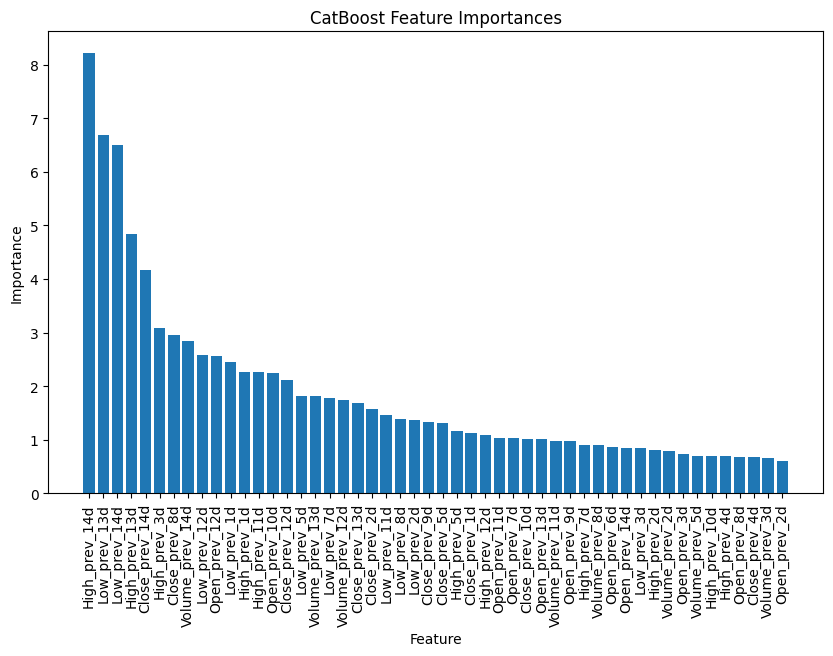

In [134]:
import matplotlib.pyplot as plt

# Assuming cb_classifier is your trained CatBoost classifier
feature_importances = cb_classifier.get_feature_importance()

# Get the names of the features
feature_names = X_train.columns  # Assuming X_train is your training data

# Sort the features by their importances
sorted_indices = feature_importances.argsort()[::-1][:50]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting the most important features
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('CatBoost Feature Importances')
plt.show()

### Wilcoxon test

In [135]:
from scipy.stats import wilcoxon
import pandas as pd

df_results_with_news = pd.read_csv("/content/results/cb_classifier_results_finance_news.csv")
df_results_without_news = pd.read_csv("/content/results/cb_classifier_results_finance.csv")

# Например, сравним метрику accuracy
accuracy_with_news = df_results_with_news['Accuracy']
accuracy_without_news = df_results_without_news['Accuracy']

# Применяем Wilcoxon signed-rank test
stat, p_value = wilcoxon(accuracy_with_news, accuracy_without_news)

# Выводим результаты теста
print(f'Wilcoxon test statistic: {stat}')
print(f'P-value: {p_value}')

# Проверка на статистическую значимость
alpha = 0.05
if p_value < alpha:
    print('The difference between the models is statistically significant.')
else:
    print('The difference between the models is not statistically significant.')

Wilcoxon test statistic: 7.0
P-value: 0.00115966796875
The difference between the models is statistically significant.


### Exp

In [137]:
!cp -r /content/results /content/gdrive/Shareddrives/gdrive/datasets/thesis/results